In [1]:
from utils import State, states
from game import Dealer, Player, Action
import numpy as np
from tqdm import tnrange
from statistics import mean
import random

class MonteCarlo():

    policy = {k: Action.STAND if k.player_sum >=
              19 else Action.HIT for k in states}
    returns = {(k, a): [] for k in states for a in list(Action)}
    Q = {k: {} for k in states}
    reward_history = [0]

    DELTA = 0.05
    TIMES_TESTED_SAME_STATE = 1000

    def __init__(self, improve = True):
        self.IMPROVE = improve

    def calculate(self, number=500000):
        """Estimate many times
        Keyword Arguments:
            number {int} -- Number of times to estimate (default: {100000})
        Returns:
            Dictionary -- Estimated policy
        """
        for i in tnrange(0, number):
            self.estimate_one()

        if self.IMPROVE:
            for k, v in self.Q.items():
                if abs(v[Action.HIT] - v[Action.STAND]) < self.DELTA:
                    for i in range(0, self.TIMES_TESTED_SAME_STATE):
                        self.estimate_one(k)

        return self.policy

    def estimate_one(self, starting_state=None):
        episode, reward = self.generate_episode(starting_state)
        for state, action in episode:
            self.returns[(state, action)].append(reward)
            self.Q[state][action] = mean(self.returns[(state, action)])
            self.reward_history.append(self.reward_history[-1] + reward)

        for state, _ in episode:
            self.policy[state] = max(self.Q[state], key=self.Q[state].get)

    def generate_episode(self, starting_state=None):
        """Generate episode using current policy
        Returns:
            list(state, action) -- List of pairs(state, action)
            int -- reward (1 or 0 or -1)
        """
        player = Player()
        dealer = Dealer()
        current_state = starting_state if starting_state is not None else random.choice(
            states)
        current_action = random.choice(list(Action))

        player.sum = current_state.player_sum
        player.usable_ace = current_state.player_usable_ace
        dealer.sum = current_state.dealer_card

        episode = [(current_state, current_action)]
        reward = 0

        while True:
            if current_action == Action.HIT:
                player.hit()
                if player.sum > 21:
                    reward = -1
                    break
                else:
                    current_state = State(
                        player.sum, player.usable_ace, dealer.sum)
                    current_action = self.policy[current_state]
                    episode.append((current_state, current_action))
            else:
                dealer.play_to_end()
                if dealer.sum > 21 or dealer.sum < player.sum:
                    reward = 1
                elif dealer.sum == player.sum:
                    reward = 0
                else:
                    reward = -1
                break

        return episode, reward

In [2]:
agent = MonteCarlo()

In [3]:
agent.calculate()

/Users/artem/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`


{2 12 False: <Action.HIT: 0>,
 3 12 False: <Action.HIT: 0>,
 4 12 False: <Action.STAND: 1>,
 5 12 False: <Action.STAND: 1>,
 6 12 False: <Action.STAND: 1>,
 7 12 False: <Action.HIT: 0>,
 8 12 False: <Action.HIT: 0>,
 9 12 False: <Action.HIT: 0>,
 10 12 False: <Action.HIT: 0>,
 11 12 False: <Action.HIT: 0>,
 2 13 False: <Action.HIT: 0>,
 3 13 False: <Action.STAND: 1>,
 4 13 False: <Action.STAND: 1>,
 5 13 False: <Action.STAND: 1>,
 6 13 False: <Action.STAND: 1>,
 7 13 False: <Action.HIT: 0>,
 8 13 False: <Action.HIT: 0>,
 9 13 False: <Action.HIT: 0>,
 10 13 False: <Action.HIT: 0>,
 11 13 False: <Action.HIT: 0>,
 2 14 False: <Action.STAND: 1>,
 3 14 False: <Action.STAND: 1>,
 4 14 False: <Action.STAND: 1>,
 5 14 False: <Action.STAND: 1>,
 6 14 False: <Action.STAND: 1>,
 7 14 False: <Action.HIT: 0>,
 8 14 False: <Action.HIT: 0>,
 9 14 False: <Action.HIT: 0>,
 10 14 False: <Action.HIT: 0>,
 11 14 False: <Action.HIT: 0>,
 2 15 False: <Action.STAND: 1>,
 3 15 False: <Action.STAND: 1>,
 4 15 

In [4]:
import matplotlib.pyplot as plt

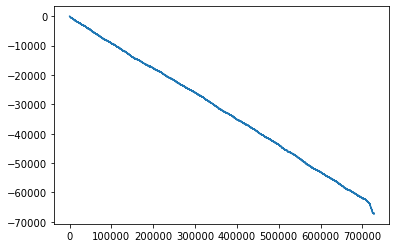

In [5]:
plt.plot(agent.reward_history)